<a href="https://colab.research.google.com/github/guy-977/x-ray-pneumonia/blob/main/x_ray_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialize Kaggle**
We will use kaggle dataset for chest x-ray, to use kaggle API do the following:

1) install kaggle[link text](https://)

```
!pip install -q kaggle
```



2)   Choose the kaggle.json file that you downloaded 
```
from google.colab import files
```



    
    file.upload()
  
 3) Make directory named kaggle and copy kaggle.json file there.


```
!mkdir ~/.kaggle
```


```
!cp kaggle.json ~/.kaggle/
```


  

4) Change the permissions of the file.


```
!chmod 600 ~/.kaggle/kaggle.json
```


5) - That's all ! You can check if everything's okay by running this command.


```
!kaggle datasets list
```



In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9540        281  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            987         36  1.0              
michals22/coffee-dataset                                        Coffee dataset                                       24KB  2022-12-15 20:02:12           1105         41  1.0              
thedevastator/jobs-dataset

# **download datasets**


```
!kaggle competitions download -c 'name-of-competition'
```


- Use unzip command to unzip the data:


```
!makdir folder
```



```
!uzip file.zip -d folder
```



In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [00:18<00:00, 160MB/s]
100% 2.29G/2.29G [00:18<00:00, 131MB/s]


# **uzip dataset**

In [ ]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# Import dependencies

In [ ]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import error_rate
from fastai.callback.core import DataBlock
import random, os
import torch
from fastai.vision.all import *
import os
import pandas as pd
import numpy as np

# training data path

In [ ]:
from pickleshare import Path
x  = '/content/chest_xray/'
path = Path(x)
path.ls

(#5) [Path('/content/chest_xray/__MACOSX'),Path('/content/chest_xray/val'),Path('/content/chest_xray/test'),Path('/content/chest_xray/train'),Path('/content/chest_xray/chest_xray')]

# load training data

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = data.dataloaders(path)

['NORMAL', 'PNEUMONIA']


(9370, 2342)

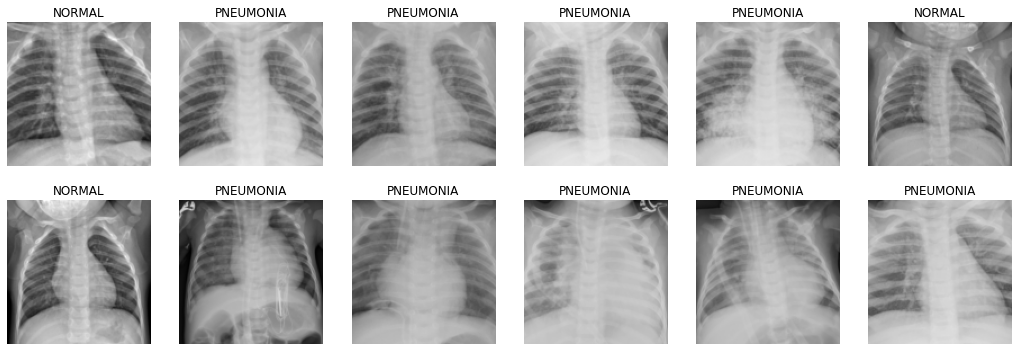

In [ ]:
dls.valid.show_batch(max_n=12, nrows=2)
print(dls.vocab)
len(dls.train_ds), len(dls.valid_ds)

# Train the model

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(6)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.384877,0.187626,0.061913,0.938087,11:39


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.174752,0.075670,0.025619,0.974381,15:22
1,0.103829,0.056040,0.018360,0.981640,15:14


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.174752,0.075670,0.025619,0.974381,15:22
1,0.103829,0.056040,0.018360,0.981640,15:14
2,0.056376,0.039330,0.011529,0.988471,15:11
3,0.034522,0.041065,0.010675,0.989325,15:10
4,0.022177,0.029516,0.008540,0.991460,15:10
5,0.014966,0.025964,0.007259,0.992741,15:16


# Save model

In [ ]:
learn.save('pneumonia_1')

Path('models/pneumonia_1.pth')

# Predict

In [ ]:
img = PILImage.create('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
print(learn.predict(img)[0])

NORMAL


In [ ]:
img = PILImage.create('/content/chest_xray/test/PNEUMONIA/person103_bacteria_489.jpeg')
print(learn.predict(img)[0])

PNEUMONIA


In [ ]:
model = load_model('pneumonia_1.pth', resnet18, )

TypeError: ignored